In [22]:
import tensorflow as tf


In [23]:
#importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import random
import numpy as np

In [24]:
#loading the training and testing data
mnist=tf.keras.datasets.mnist

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [27]:
#for finding the image

In [28]:
# defining the network architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
#training the model using sgd(stochastic gradient decscent)
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6667 - accuracy: 0.8249 - val_loss: 0.3299 - val_accuracy: 0.9066
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3010 - accuracy: 0.9141 - val_loss: 0.2609 - val_accuracy: 0.9265
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2485 - accuracy: 0.9284 - val_loss: 0.2299 - val_accuracy: 0.9306
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2152 - accuracy: 0.9390 - val_loss: 0.2000 - val_accuracy: 0.9406
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1893 - accuracy: 0.9459 - val_loss: 0.1814 - val_accuracy: 0.9463
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1690 - accuracy: 0.9520 - val_loss: 0.1617 - val_accuracy: 0.9512
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1529 - accuracy: 0.9561 - val_loss: 0.1516 - val_accuracy:

In [14]:
#evaluting the Network
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1192 - accuracy: 0.9643
Test Loss: 0.11922940611839294
Test Accuracy: 0.9642999768257141


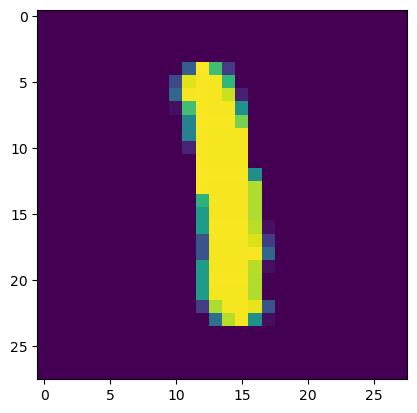

313/313 [==============================] - 1s 3ms/step
Handwritten number in the image is= 1


In [21]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

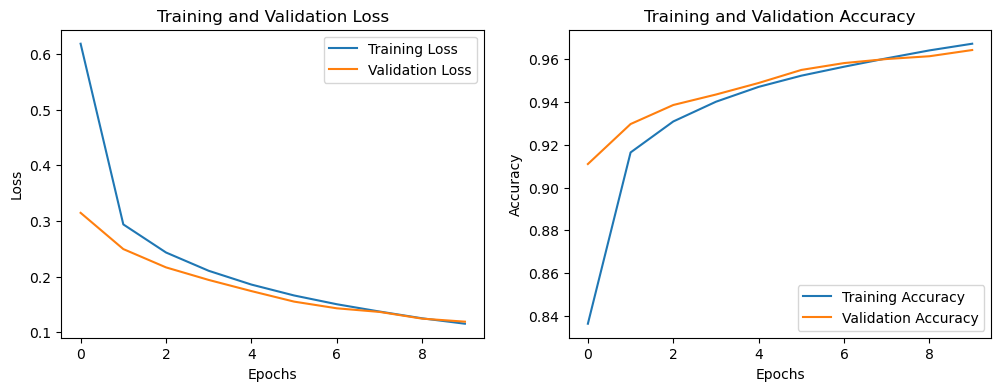

In [20]:
# plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()